In [1]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model
import statsmodels.stats as stats
import statsmodels.stats.api as sms
from sklearn import preprocessing

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
ordtable, cattable = data_download.get_tables(data_download.get_dataframes())

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


C:\Users\caell\new_Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


C:\Users\caell\new_Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [14]:
ordtable


,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,193000,0,1,1.0,7,1140,0,0,0,1760,1030,620,410,6,100,0,0,220,3,0,1,1,0,1,0,0,1980,0,3,0,9670,0,0,0,0,0,0,0,0,0,0,0,0,1
1,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0
4,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28296,669950,0,1,2.0,8,1193,0,0,0,2482,0,0,0,0,800,300,0,0,5,1,0,3,2,0,0,0,2018,0,3,0,11000,0,0,0,0,0,0,0,0,0,0,0,0,2
28297,1150000,0,1,1.5,7,1340,0,0,0,2910,850,850,0,7,0,0,0,140,4,0,1,1,0,1,0,0,1945,0,4,0,8360,0,0,0,0,0,0,0,0,0,0,0,0,0
28298,764500,25,1,1.0,8,1740,0,0,0,2900,1160,1160,0,7,0,230,0,0,4,1,0,1,0,1,0,1,1955,0,4,0,14889,0,0,0,0,0,0,0,0,0,0,0,0,0
28299,469000,0,1,2.0,9,1240,0,0,0,2420,0,0,0,0,510,40,0,0,4,1,0,2,0,1,0,0,1990,0,3,4610,6175,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
ordcorrs = ordtable.corr()['SalePrice'].sort_values().head(20)
bigcorrs = ordtable[['SalePrice'] + list(ordcorrs.index)]

In [19]:
bigcorrs

,SalePrice,Condition,FpFreestanding,SqFtUnfinFull,SqFtEnclosedPorch,TrafficNoise,SqFtUnfinHalf,NbrLivingUnits,MtRainier,SmallLakeRiverCreek,WfntFootage,SqFtLot,LotDepthFactor,OtherView,BrickStone,SqFtGarageBasement,YrRenovated,FpAdditional,SqFtUpperFloor,AddnlCost,Cascades
0,193000,3,0,0,0,1,0,1,0,0,0,9670,0,0,0,410,0,0,0,0,0
1,550000,3,0,0,0,0,0,1,0,0,0,2500,0,0,0,0,0,0,650,0,0
2,648500,3,0,0,0,0,0,1,0,0,0,5250,0,0,0,0,0,0,0,6000,0
3,1445000,3,0,0,0,0,0,1,0,0,0,5499,0,0,0,0,0,0,0,0,0
4,785000,3,0,0,0,0,0,1,0,0,0,1313,0,0,0,210,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28296,669950,3,0,0,0,2,0,1,0,0,0,11000,0,0,0,0,0,0,0,0,0
28297,1150000,4,0,0,0,0,0,1,0,0,0,8360,0,0,0,0,0,0,0,0,0
28298,764500,4,0,0,0,0,0,1,0,0,0,14889,0,0,25,0,0,1,0,0,0
28299,469000,3,0,0,0,0,0,1,0,0,0,6175,0,0,0,0,0,0,0,4610,0


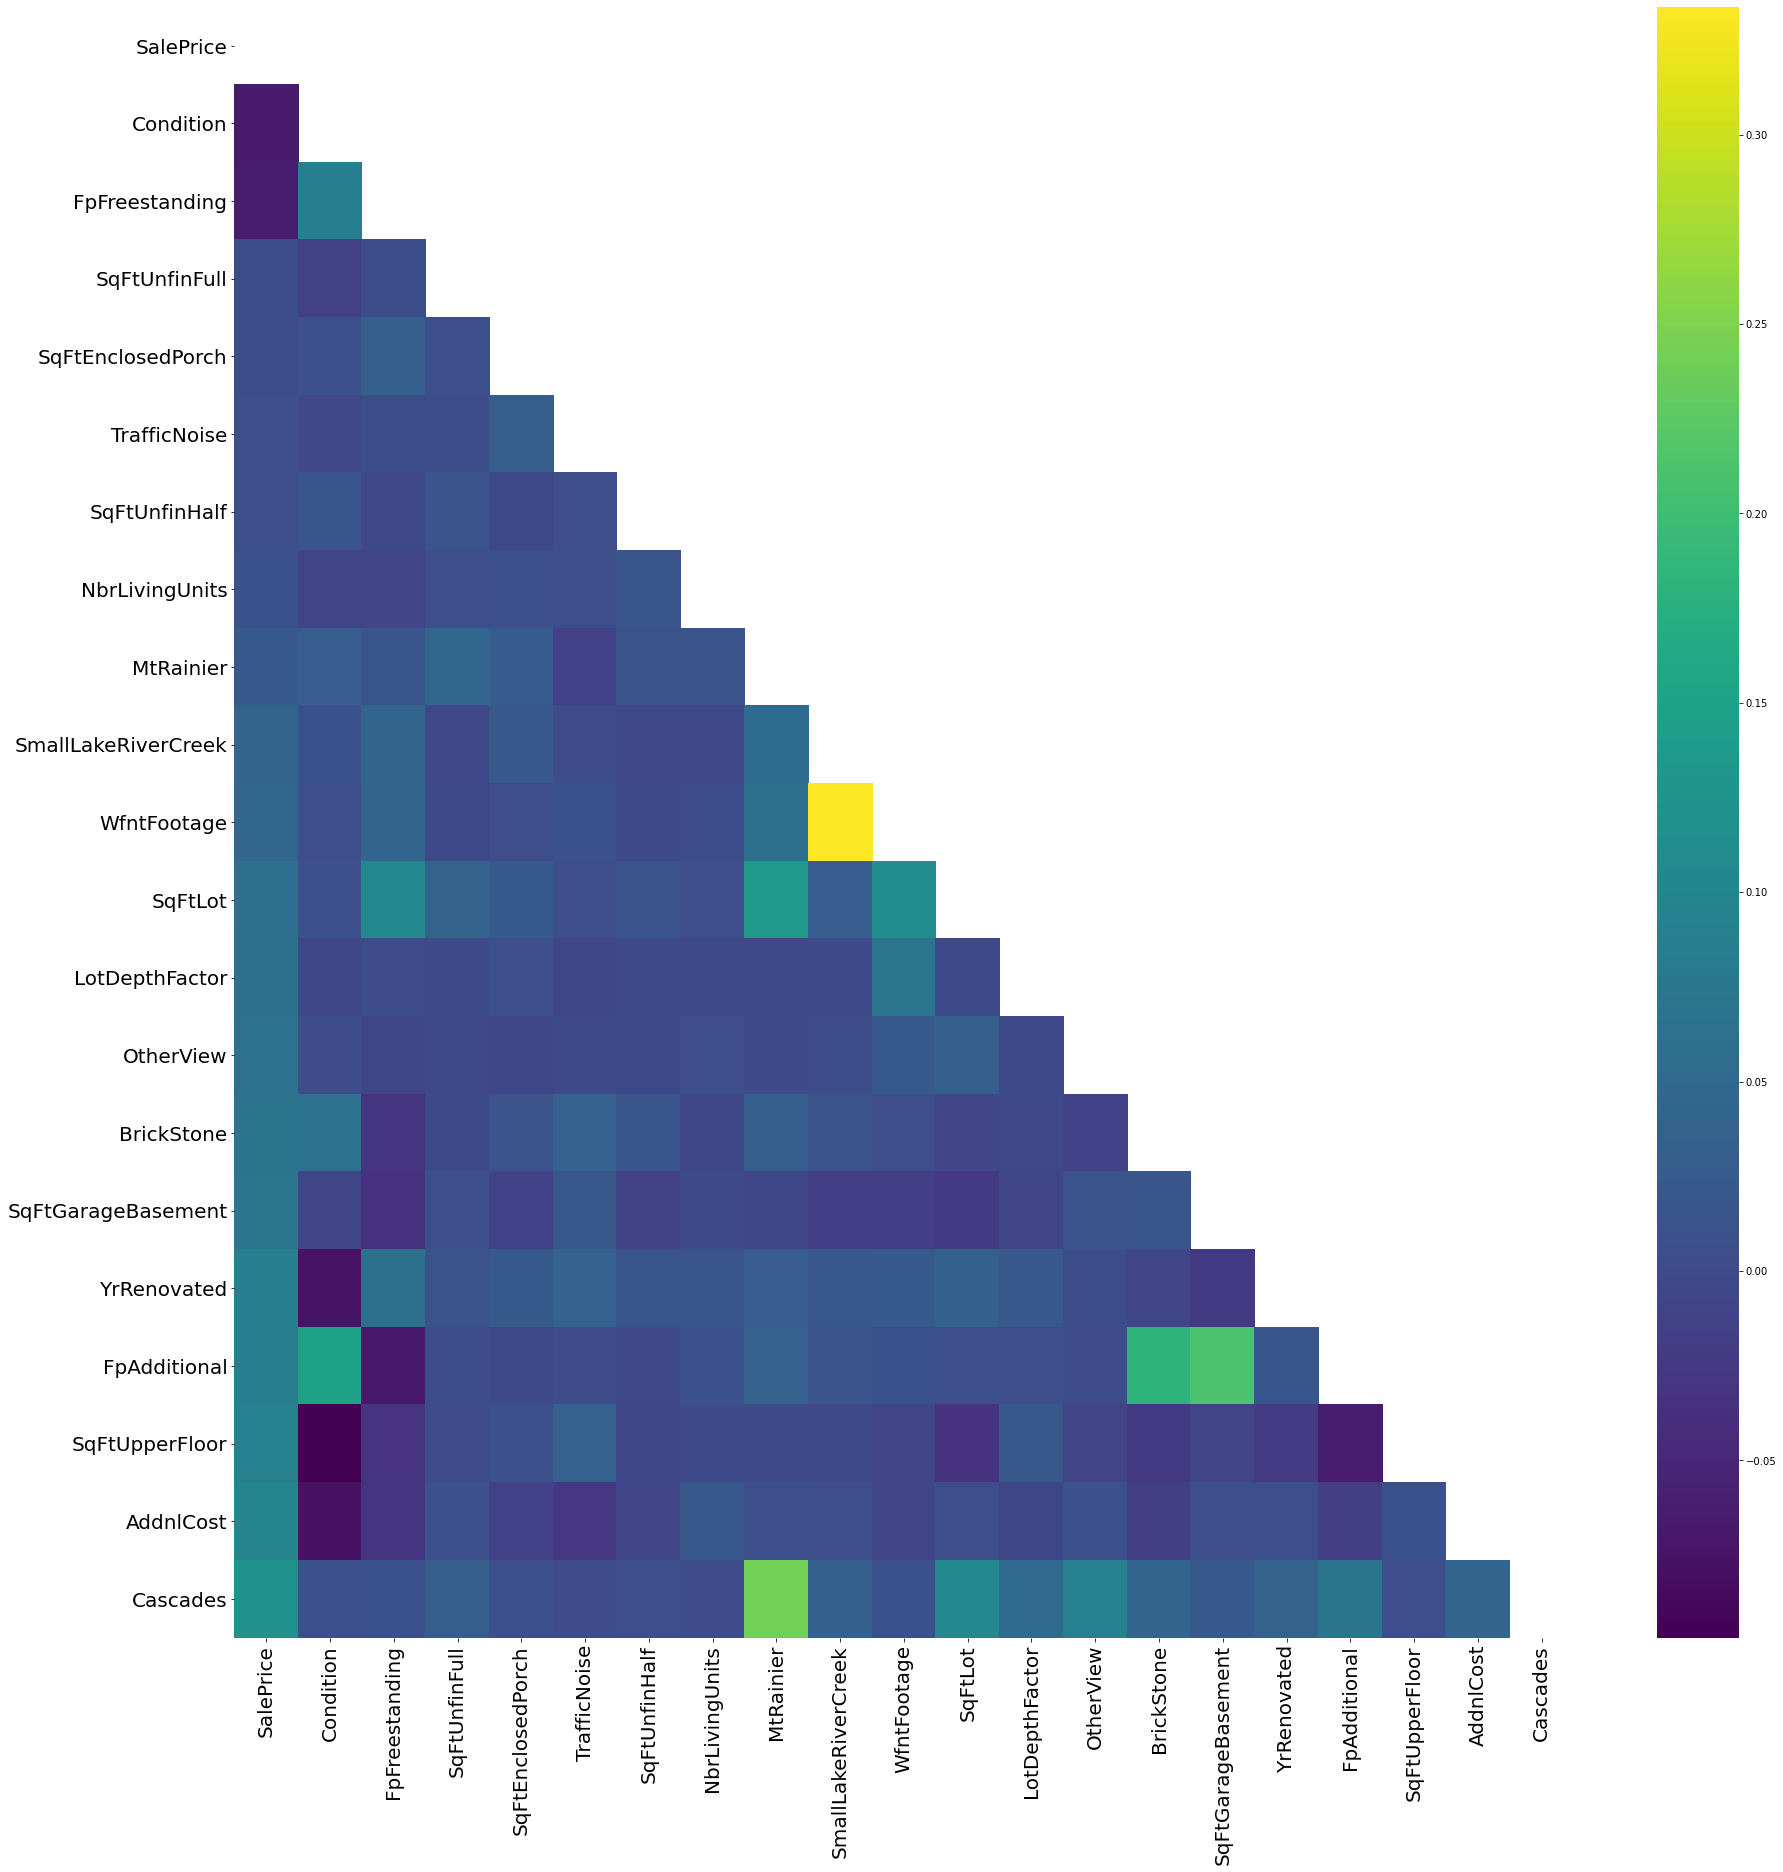

In [30]:
mask = np.triu(np.ones_like(bigcorrs.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize = (30,30))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.heatmap(bigcorrs.corr(), mask= mask, ax = ax, cmap = 'viridis')

In [31]:
pt = preprocessing.MinMaxScaler()
predictors = pd.DataFrame(pt.fit_transform(bigcorrs))
predictors.columns = bigcorrs.columns

In [38]:
predictors = bigcorrs

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=4)
select = select.fit(X = ordtable.drop('SalePrice', axis=1), y = ordtable['SalePrice'])

select.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False])

In [58]:
predictors = ordtable[ordtable.columns[[True] + list(select.support_) ]]

In [59]:
preds = str(predictors.columns[1])
for pred in predictors.columns[2:]:
    preds = preds + f' + {pred}'
preds

'BldgGrade + SeattleSkyline + LakeWashington + LakeSammamish'

In [60]:
formula = f'SalePrice ~ {preds}'
formula

'SalePrice ~ BldgGrade + SeattleSkyline + LakeWashington + LakeSammamish'

In [61]:
model = smf.ols(formula = formula, data = predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     5147.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:45:39   Log-Likelihood:            -3.9396e+05
No. Observations:               27924   AIC:                         7.879e+05
Df Residuals:                   27919   BIC:                         7.880e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.003e+06   1.35e+04    -74.109      0.000   -1.03e+06   -9.77e+05
BldgGrade        2.27e+05   1741.139    130.371      0.000    2.24e+05     2.3e+05
SeattleSkyline  1.327e+05   8652.344     15.335      0.000    1.16e+05     1.5e+05
LakeWashington  1.822e+05   5828.075     31.271      0.000    1.71e+05    1.94e+05
LakeSammamish    1.82e+05   1.16e+04     15.705      0.000    1.59e+05    2.05e+05
==============================================================================
Omnibus:                     8319.844   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34068.514
Skew:                           1.428   Prob(JB):                         0.00
Kurtosis:                       7.597   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model.resid

0       -392598.779691
1       -262592.101619
2       -164092.101619
3        405414.576452
4        -27592.101619
             ...      
28296   -142642.101619
28297    564401.220309
28298    -48092.101619
28299   -570585.423548
28300     24907.898381
Length: 27924, dtype: float64

C:\Users\caell\new_Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


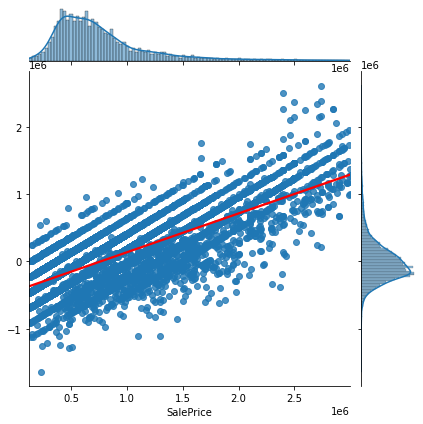

In [70]:
sns.jointplot(predictors['SalePrice'],model.resid, kind = 'reg', line_kws = {'color':"red"})